In [1]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import librosa
import matplotlib.pyplot as plt
import matplotlib.image as img
import pylab

import IPython.display as ipd

# Functions

In [2]:
def load_wav(path, decimate=None):
    """
        Load audio data.

        Parameters
        ----------
        path : str
            Wav file path.
        decimate : int
            If not None, downsampling by a factor of `decimate` value.

        Returns:
        -------
        data : array-like
            Audio data.
        fs : int
            Sampling frequency in Hz.
    """
    # Load data
    fs, data = wavfile.read(path)

    data = data.astype(np.float32)

    if decimate is not None:
        data = signal.decimate(data, decimate)
        fs /= decimate

    return fs, data


def plot_audio(fs,data):
    """
        Plot audio data.

        Parameters
        ----------
        data : array-like
            Audio data.
        fs : int
            Sampling frequency in Hz.

        Returns:
        -------
        None
    """
    plt.figure()
    sampled_points=len(data)
    time=[ti*1./fs for ti in range(sampled_points)]
    plt.plot(time,data)
    plt.xlabel('t [s]')
    plt.ylabel('P [W]')
    plt.show()
    plt.close()
    
    return None


def cut_audio(old_path, new_path, start, end):
    """
        Cut audio data to specific starting and end point and save it as a new wav file

        Parameters
        ----------
        old_path : str
            Original wav file path.
        new_path : str
            New wav file path.
        start : float
            Desired start time of new audio in seconds.
        end : float
            Desired end time of new audio in seconds.

        Returns:
        -------
        None
    """
    fs, data = wavfile.read(old_path)
    indx_start = int(start*fs)
    indx_end = int(end*fs)+1
    wavfile.write(new_path,fs,data[indx_start:indx_end])
    
    return None
            


def create_spec(data, fs, N_mels, N_fft, Hop_len,file_name):
    """
        Compute the Mel spectrogram from audio data.

        Parameters
        ----------
        data : array-like
            Audio data.
        fs : int
            Sampling frequency in Hz.
        n_mels : int
            Number of Mel bands to generate.
        n_fft : int
            Length of the FFT window.
        hop_len : int
            Number of samples between successive frames.

        Returns:
        -------
        S : array-like
            Array of shape (Mel bands, time) containing the spectrogram.
    """
    # Calculate spectrogram
    S = librosa.feature.melspectrogram(data, sr=fs, n_fft=N_fft, hop_length=Hop_len, n_mels=N_mels)
    S = S.astype(np.float32)

    # Convert power to dB
#     S = np.log(S * 10 + 0.001)
    S = librosa.power_to_db(S)

    return S
  
def plot_spec(S):
    """
        Plot a spectrogram.

        Parameters
        ----------
        S : array-like
            Spectrogram.
    """
    plt.figure()
    plt.imshow(S, cmap=plt.get_cmap('inferno'), aspect='auto', origin='lower')
    plt.axis('off')
    plt.savefig('spectrogrammes/'+file_name+'.png')
    plt.show()
    plt.close()

# List of species

In [3]:
file=open('list_full_names.txt','r',encoding='utf-8')
file.readline()
list_full_names=file.read()
list_full_names=list_full_names.split('\n')
file=open('list_file_names.txt','r')
file.readline()
list_file_names=file.read()
list_file_names=list_file_names.split('\n')

# Select specie

Hirondelle rustique
No audio found for this specie


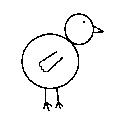

In [34]:
i=20#indice dans la liste des espèces
full_name=list_full_names[i]
file_name=list_file_names[i]
print(full_name)

try:
    im=img.imread('images/'+file_name+'.png')
    plt.imshow(im)
    plt.axis('off')
except:
    print('No audio found for this specie')
    im=img.imread('images/drawing_bird.png')
    plt.imshow(im)
    plt.axis('off')

# Listen to audio

In [35]:
ipd.Audio('audio/'+file_name+'.wav')

# Load audio

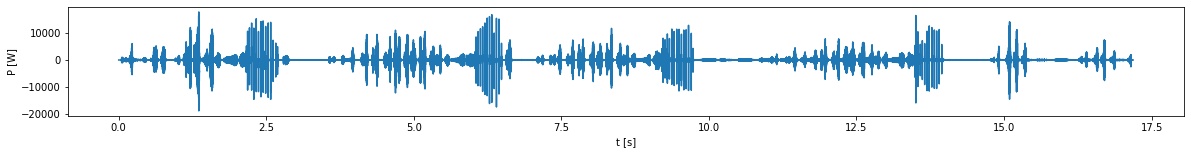

In [36]:
fs, data = load_wav('audio/'+file_name+'.wav')
plot_audio(fs,data)

# Create Mel Spectrogram from the audio

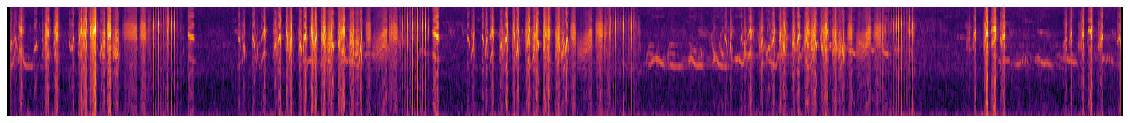

In [37]:
# From Cakir
N_MELS = 40

# MEL spec from STFT 40 ms and 20 ms overlap
N_FFT = int(0.01 * fs) + 1
HOP_LEN = int(0.005 * fs) + 1

S = create_spec(data,fs, N_MELS, N_FFT, HOP_LEN, file_name)
pylab.rcParams['figure.figsize'] = (20, 2)
plot_spec(S)